In [23]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from tqdm import tqdm
import os

In [24]:
dtime = datetime(2019, 4, 30, 00)
dtimestamp = datetime.timestamp(dtime)
ms = int(round(dtimestamp * 1000))
n_it = 100
granularity = 10 #seconds

In [47]:
def generate_scarsity(length, num_series, scarsity_percentage):
	time_series_data = []
	for _ in range(num_series):
		# Ensure the scarsity percentage is between 0 and 100
		scarsity_percentage = max(0, min(100, scarsity_percentage))
		
		time_series = []
		previous_value = random.uniform(0, 1)  # Initialize the first value randomly
		
		for _ in range(length):
			if random.randint(0, 100) <= scarsity_percentage:
				current_value = None 
			else:
				# Generate a new random value
				current_value = random.uniform(0, 1)
			time_series.append(current_value)
			previous_value = current_value
		time_series_data.append(time_series)
	return time_series_data
    
def generate_delta(length, num_series, delta_percentage):
	time_series_data = []
	for _ in range(num_series):
		delta_percentage = max(0, min(100, delta_percentage))
		time_series = []
		previous_value = random.uniform(0, 1)  # Initialize the first value randomly
		for _ in range(length):
			delta = random.uniform(-1 * delta_percentage, delta_percentage )  
			current_value = previous_value + delta
			time_series.append(current_value)
			previous_value = current_value
		time_series_data.append(time_series)
	return time_series_data
    


def generate_repeats(length, num_series, repeats_percentage):
	time_series_data = []
	for _ in range(num_series):
		# Ensure the repeats percentage is between 0 and 100
		repeats_percentage = max(0, min(100, repeats_percentage))
		
		time_series = []
		previous_value = random.uniform(0, 1)  # Initialize the first value randomly
		
		for _ in range(length):
			if random.randint(0, 100) < repeats_percentage:
				current_value = previous_value 
			else:
				# Generate a new random value
				current_value = random.uniform(0, 1)
			
			# Ensure the generated value stays within the [0, 1] range
			current_value = max(0, min(1, current_value))
			
			time_series.append(current_value)
			previous_value = current_value
		time_series_data.append(time_series)
	return time_series_data

def generate_outliers(length, num_series, outlier_percentage,std=5):
	time_series_data = []
	for _ in range(num_series):
		# Ensure the repeats percentage is between 0 and 100
		outlier_percentage = max(0, min(100, outlier_percentage))
		
		time_series = []		
		for _ in range(length):
			if random.randint(0, 100) < outlier_percentage:
                # Generate a new random outlier
			    current_value =  random.uniform(10, 1) 
			else:
				# Generate a new random value
				current_value = random.uniform(0, 1)
			
			# Ensure the generated value stays within the [0, 1] range
			#current_value = max(0, min(1, current_value))
			
			time_series.append(current_value)
			previous_value = current_value
		time_series_data.append(time_series)
	return time_series_data

def export(ts, file):
	try:
		os.mkdir("../datasets/compression/")
	except FileExistsError:
		pass
	df = pd.DataFrame(ts).T
	df['time'] = [datetime.fromtimestamp((ms + i * 1000 * granularity) // 1000).strftime("%Y-%m-%dT%H:%M:%S") for i in range(len(df))] #2019-03-01T00:00:00
	df['st'] = ['st' + str(i // (len(df) // 10)) for i in range(len(df))] 
	df = df[ ['time'] + ['st'] + [ col for col in df.columns if col != 'time' and col != 'st' ] ]
	col_names = list(df.columns)
	df.columns = col_names[:2] + [ "s"+str(id) for id in col_names[2:]]
	df = df.rename(columns={'st': 'id_station'})
	df.to_csv("../datasets/compression/"+file, index=False)
	#print(df)
	return df

In [48]:

# time_series_data = generate_repeats(length, num_series, repeats_percentage)
# time_series_data = export(time_series_data, 'repeats_'+str(repeats_percentage)+'.csv')
# time_series_data.iloc[:,0:2]
# (time_series_data['id_station'] == "st0").values

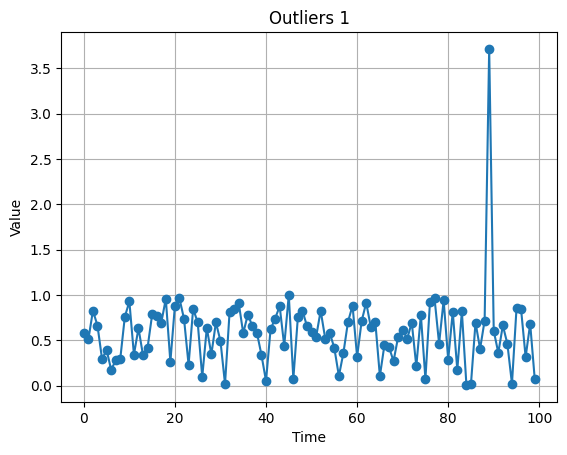

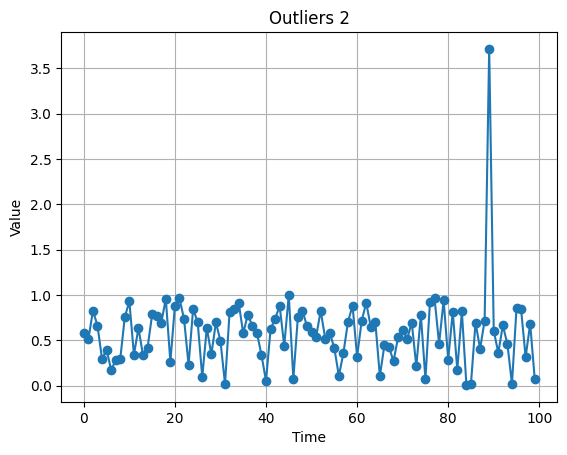

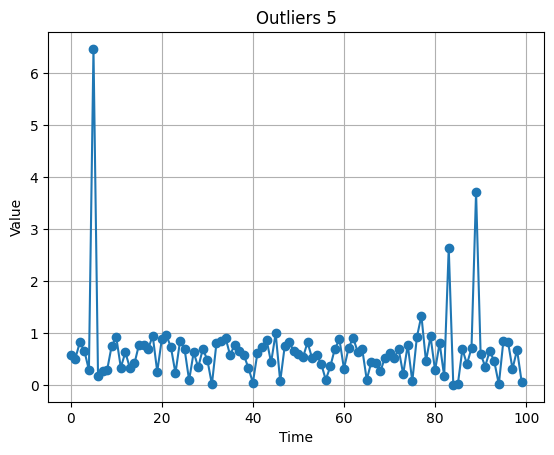

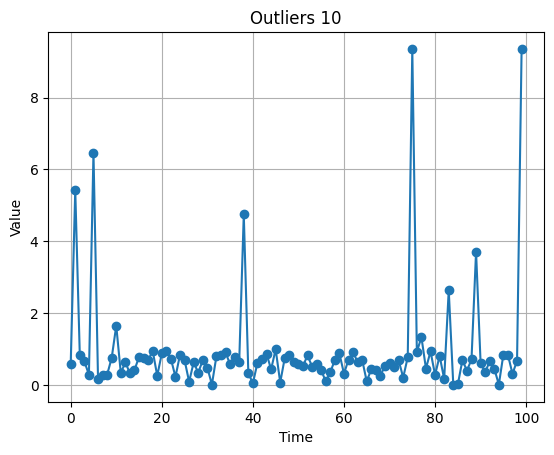

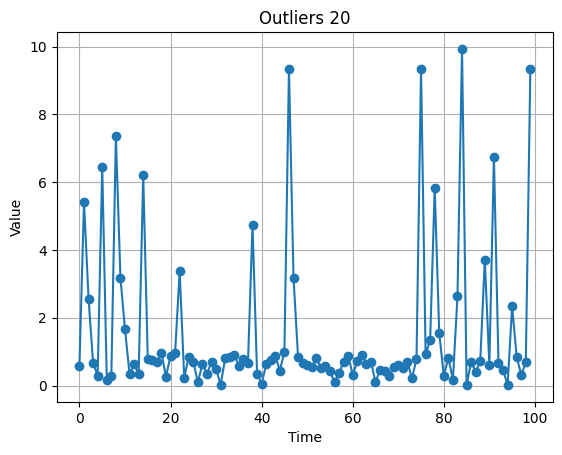

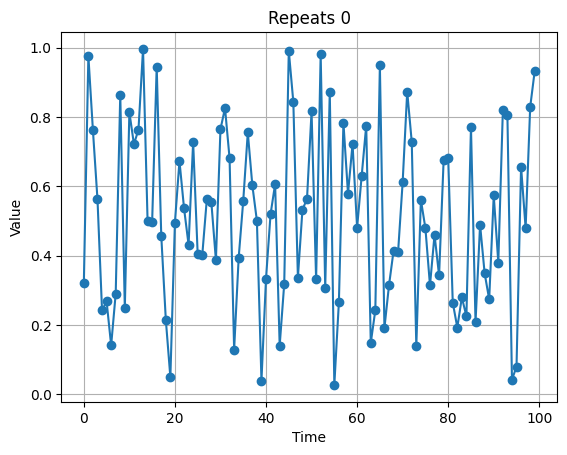

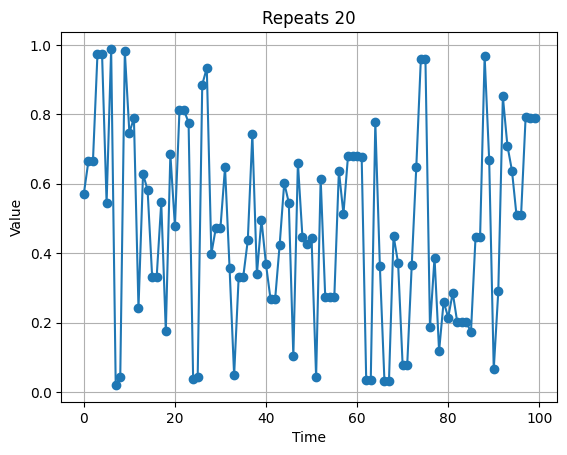

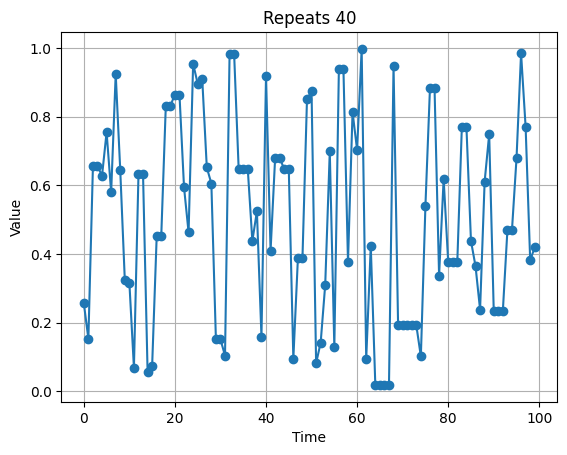

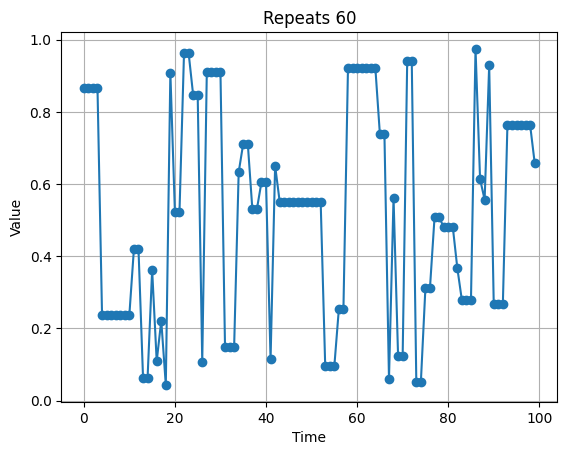

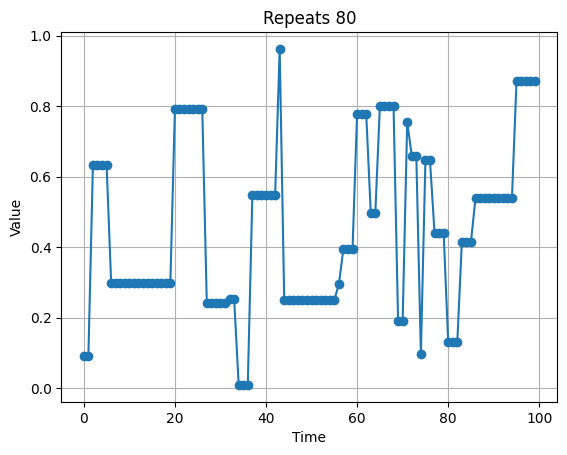

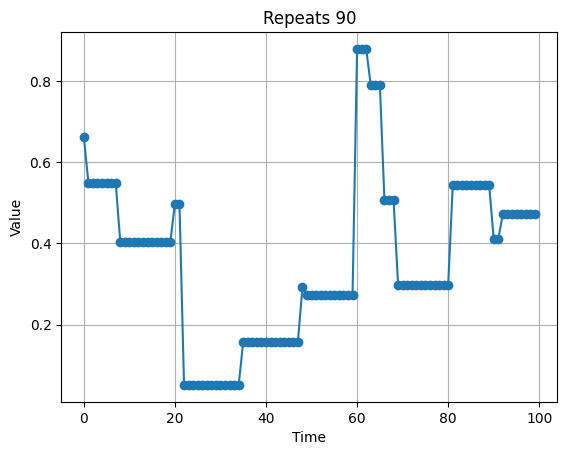

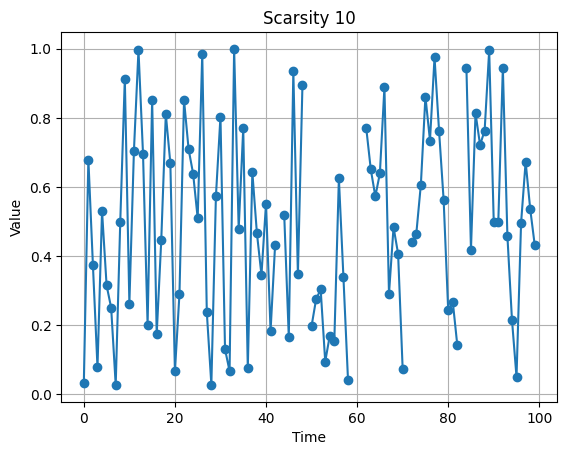

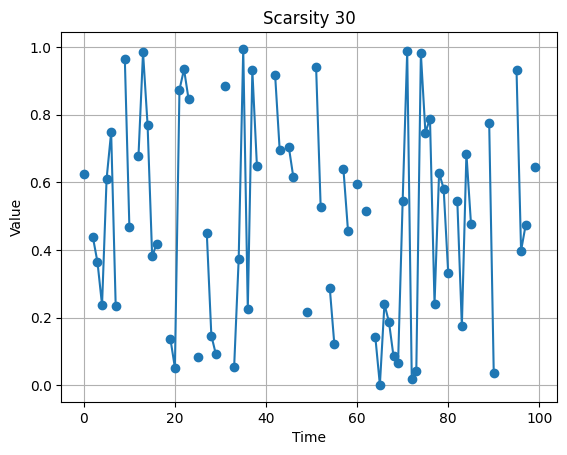

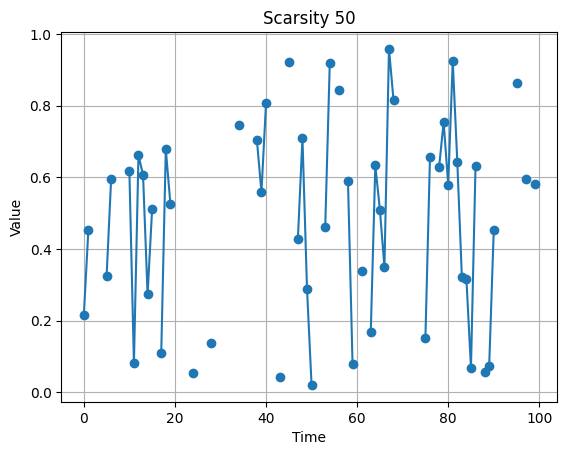

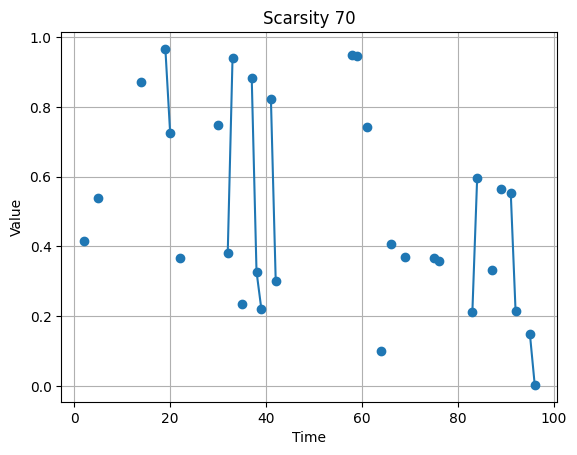

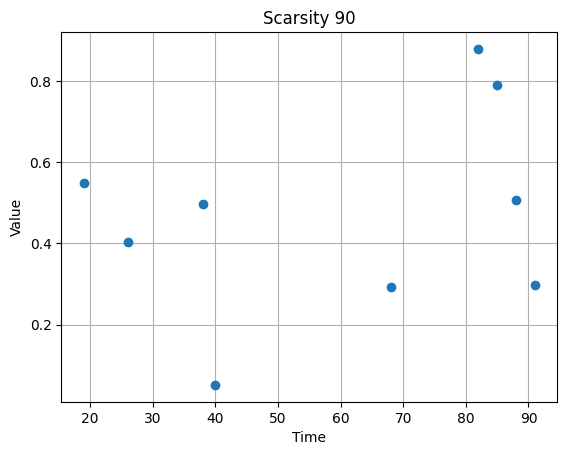

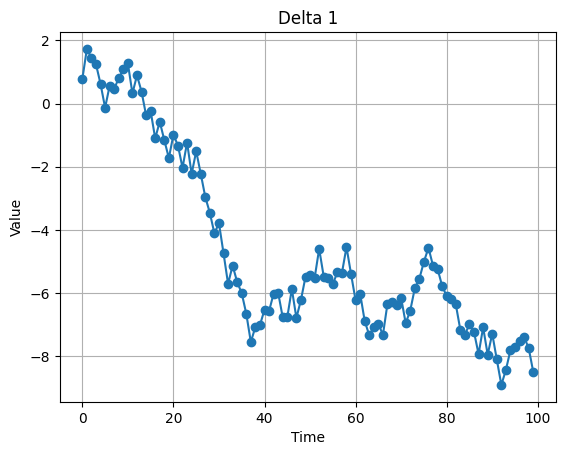

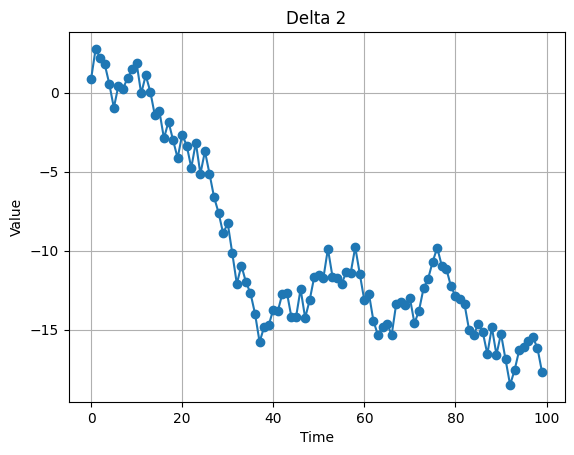

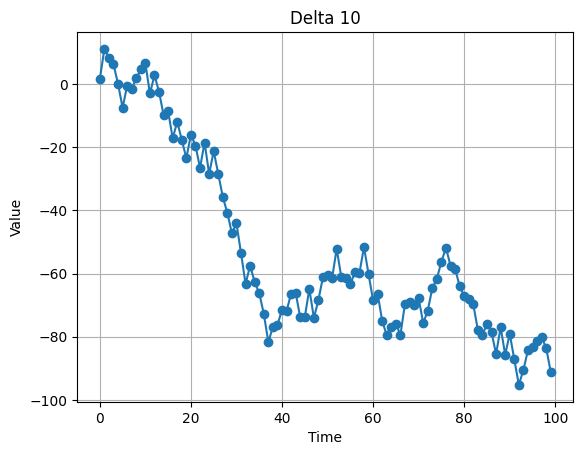

In [54]:
length=1000
num_series = 100
repeats_percentage=20
scarsity_percentage=50
delta_percentage=1


for outlier_percentage in [1,2,5,10,20]:
    random.seed(10)
    time_series_data = generate_outliers(length, num_series, outlier_percentage)
    time_series_data = export(time_series_data, 'outliers_'+str(outlier_percentage)+'.csv')
    # Plot the time series
    time_series_data.iloc[(time_series_data['id_station'] == "st0").values, 3].plot(marker='o', linestyle='-')
    plt.title('Outliers ' + str(outlier_percentage) )
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()
    
for repeats_percentage in [0,20,40,60,80,90]:
    random.seed(42)
    time_series_data = generate_repeats(length, num_series, repeats_percentage)
    time_series_data = export(time_series_data, 'repeats_'+str(repeats_percentage)+'.csv')
    # Plot the time series
    time_series_data.iloc[(time_series_data['id_station'] == "st0").values, 3].plot(marker='o', linestyle='-')
    plt.title('Repeats ' + str(repeats_percentage) )
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()


for scarsity_percentage in [10,30,50,70,90]:
    random.seed(42)
    time_series_data = generate_scarsity(length, num_series, scarsity_percentage)
    time_series_data = export(time_series_data, 'scarsity_'+str(scarsity_percentage)+'.csv')
    time_series_data.iloc[(time_series_data['id_station'] == "st0").values, 3].plot(marker='o', linestyle='-')
    plt.title('Scarsity ' + str(scarsity_percentage) )
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()
    
for delta_percentage in [1,2,10]:
    random.seed(42)
    time_series_data = generate_delta(length, num_series, delta_percentage)
    time_series_data = export(time_series_data, 'delta_'+str(delta_percentage)+'.csv')
    time_series_data.iloc[(time_series_data['id_station'] == "st0").values, 3].plot(marker='o', linestyle='-')
    plt.title('Delta ' + str(delta_percentage) )
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()
    

In [53]:
os.listdir()

['basic_queries_remote_d1_Partition.ipynb',
 'udfs',
 'compatible_compression.ipynb',
 'basic_queries_remote_d1_Layout.ipynb',
 'oq',
 'basic_queries_remote_d2.ipynb',
 'sq',
 'basic_queries_remote_d2_runAll.ipynb',
 'basic_queries_remote_d2_runAll_varyParams.ipynb',
 'complex_queries_remote_runALL.ipynb',
 'TSM_Technical_Report.pdf',
 '.ipynb_checkpoints',
 'complex_queries_remote.ipynb',
 'complex_queries_remote_runALL_d1.ipynb',
 'basic_queries_remote_d1_runAll.ipynb',
 'extra']